In [1]:

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


In [7]:
# code adapted from http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
def plotClassifier(model, X, y, transformation=None, filename=None):
    x1 = X[:, 0]
    x2 = X[:, 1]
    
    x1_min, x1_max = int(x1.min()) - 1, int(x1.max()) + 1
    x2_min, x2_max = int(x2.min()) - 1, int(x2.max()) + 1

    x1_line =  np.linspace(x1_min, x1_max,200)
    x2_line =  np.linspace(x2_min, x2_max,200)

    x1_mesh, x2_mesh = np.meshgrid(x1_line, x2_line)

    mesh_data = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
    
    if transformation is not None:
        mesh_data = transformation(mesh_data)
    y_pred = model.predict(mesh_data)
    y_pred = np.reshape(y_pred, x1_mesh.shape)

    plt.xlim([x1_mesh.min(), x1_mesh.max()])
    plt.ylim([x2_mesh.min(), x2_mesh.max()])

    plt.contourf(x1_mesh, x2_mesh, -y_pred, cmap=plt.cm.RdBu, alpha=0.6)

    plt.scatter(x1[y<0], x2[y<0], color="b", marker="x", label="class $-1$")
    plt.scatter(x1[y>0], x2[y>0], color="r", marker="o", label="class $+1$")
    plt.legend(loc="best")
    plt.tick_params(axis='both', which='both', bottom='off', left='off', labelbottom='off', labelleft='off') # remove ticks
    if filename is not None:
        plt.savefig(filename)

In [8]:
# make up some fake data X, y
np.random.seed(8)
N = 20
X = np.random.randn(N,2)
y = np.random.choice((-1,+1),size=N)
X[y>0,0] += 1
X[y>0,1] += 1
print(X)

[[ 0.09120472  1.09128273]
 [-1.94697031 -1.38634953]
 [-2.29649157  2.4098343 ]
 [ 1.72783617  2.20455628]
 [ 0.79482764  0.9764211 ]
 [-1.18342715  1.91636361]
 [-1.1233268  -0.66403547]
 [-0.37835857 -0.79161527]
 [ 0.85954811 -0.230789  ]
 [-0.06566103 -0.20863623]
 [ 1.34686857 -0.6069528 ]
 [-0.17424821  0.42405142]
 [-1.6459901  -0.48354095]
 [ 0.53546825  1.16614049]
 [ 0.16168311 -0.67283393]
 [ 1.44252413 -0.22148061]
 [ 0.03126431  0.18192959]
 [-0.06292873 -0.54156846]
 [ 0.47451842 -1.16459117]
 [-0.50090939 -0.40856096]]


### Ramdom Forest

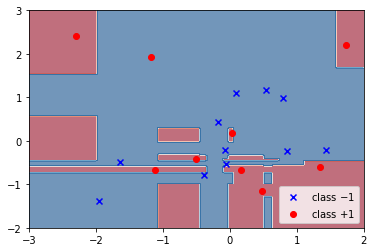

In [9]:
rf = RandomForestClassifier(n_estimators=6)
rf.fit(X,y)
plotClassifier(rf, X, y)

### Split up the random forest into its constituent trees

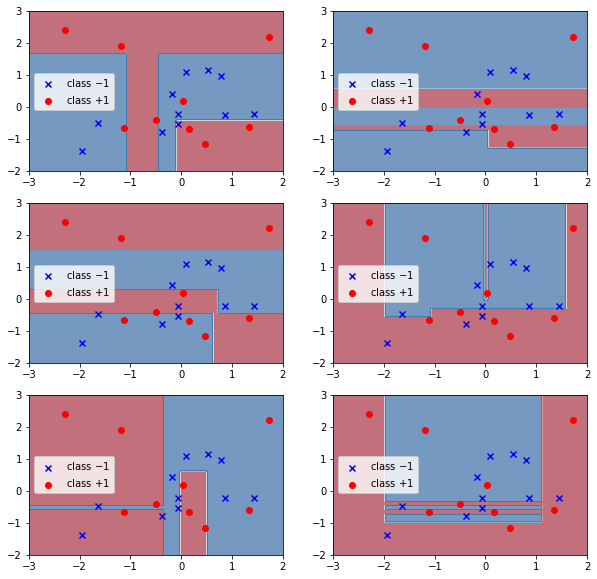

In [10]:
plt.figure(figsize=(10,10))
for i, tree in enumerate(rf.estimators_):
    plt.subplot(3,2,i+1);
    plotClassifier(tree, X, y);